Video 03
mse_rotate:  21.322443658137942
mse_translate:  12273.717164102205
Video 04
mse_rotate:  0.29351299951375875
mse_translate:  563.8550183902388
Video 05
mse_rotate:  26.82565359499836
mse_translate:  4972.741825603133
Video 06
mse_rotate:  119.90619154757101
mse_translate:  1657.1793763442638
Video 07
mse_rotate:  56.26808231594011
mse_translate:  2585.253545415062
Video 10
mse_rotate:  21.291843273569004
mse_translate:  2596.780136232669


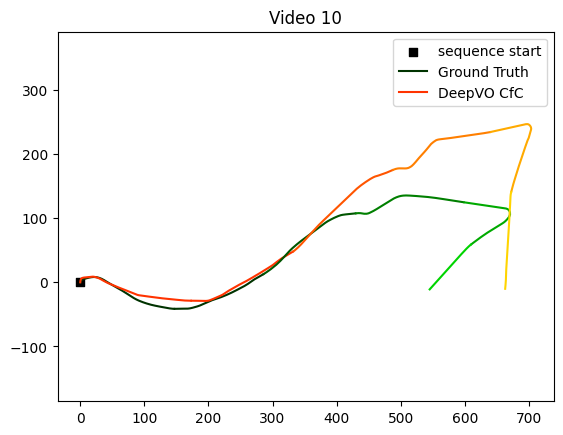

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from params import par

pose_GT_dir = par.pose_dir  #'dataset/dataset/poses/'
predicted_result_dir = 'result/'
gradient_color = True

def plot_route(gt, out, c_gt='g', c_out='r'):
    x_idx = 3
    y_idx = 5
    x = [v for v in gt[:, x_idx]]
    y = [v for v in gt[:, y_idx]]
    plt.plot(x, y, color=c_gt, label='Ground Truth')
    #plt.scatter(x, y, color='b')

    x = [v for v in out[:, x_idx]]
    y = [v for v in out[:, y_idx]]
    plt.plot(x, y, color=c_out, label='DeepVO CfC')
    #plt.scatter(x, y, color='b')
    plt.gca().set_aspect('equal', adjustable='datalim')


# Load in GT and predicted pose
# video_list = ['00', '01', '02', '05', '08', '09']
# video_list = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
video_list = ['03', '04', '05', '06', '07', '10']
# video_list = ['04', '05', '07', '09', '10']
# video_list += ['00', '01', '02', '03', '06', '08']


for video in video_list:
    print('='*50)
    print('Video {}'.format(video))

    GT_pose_path = '{}{}.npy'.format(pose_GT_dir, video)
    gt = np.load(GT_pose_path)
    pose_result_path = '{}out_{}.txt'.format(predicted_result_dir, video)
    with open(pose_result_path) as f_out:
        out = [l.split('\n')[0] for l in f_out.readlines()]
        for i, line in enumerate(out):
            out[i] = [float(v) for v in line.split(',')]
        out = np.array(out)
        mse_rotate = 100 * np.mean((out[:, :3] - gt[:, :3])**2)
        mse_translate = np.mean((out[:, 3:] - gt[:, 3:6])**2)
        print('mse_rotate: ', mse_rotate)
        print('mse_translate: ', mse_translate)

    
    if gradient_color:
        # plot gradient color
        step = 200
        plt.clf()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        for st in range(0, len(out), step):
            end = st + step
            g = max(0.2, st/len(out))
            c_gt = (0, g, 0)
            c_out = (1, g, 0)
            plot_route(gt[st:end], out[st:end], c_gt, c_out)
            if st == 0:
                plt.legend()
            plt.title('Video {}'.format(video))
            save_name = '{}route_{}_gradient.png'.format(predicted_result_dir, video)
        plt.savefig(save_name)
    else:
        # plot one color
        plt.clf()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        plot_route(gt, out, 'r', 'b')
        plt.legend()
        plt.title('Video {}'.format(video))
        save_name = '{}route_{}.png'.format(predicted_result_dir, video)
        plt.savefig(save_name)
